In [1]:
from __future__ import absolute_import, division, print_function
import tensorflow as tf
import numpy as np
from tensorflow import keras



In [10]:
boston_housing = keras.datasets.boston_housing
(train_data,train_labels), (test_data, test_labels) = boston_housing.load_data()
#shuffle the training set 打乱顺序
order = np.argsort(np.random.random(train_labels.shape))
train_data = train_data[order]
train_labels = train_labels[order]

(404,)


In [11]:
print('Training set: {}'.format(train_data.shape))
print("Testing set: {}".format(test_data.shape))

Training set: (404, 13)
Testing set: (102, 13)


In [14]:
print(train_data[0])

[7.8750e-02 4.5000e+01 3.4400e+00 0.0000e+00 4.3700e-01 6.7820e+00
 4.1100e+01 3.7886e+00 5.0000e+00 3.9800e+02 1.5200e+01 3.9387e+02
 6.6800e+00]


# examples and features

In [15]:
import pandas as pd

column_names = ['CRIM', 'ZN', 'INDUS', 'CHAS', 'NOX', 'RM', 'AGE', 'DIS', 'RAD',
                'TAX', 'PTRATIO', 'B', 'LSTAT']

df = pd.DataFrame(train_data, columns=column_names)
df.head()


,CRIM,ZN,INDUS,CHAS,NOX,RM,AGE,DIS,RAD,TAX,PTRATIO,B,LSTAT
0,0.07875,45.0,3.44,0.0,0.437,6.782,41.1,3.7886,5.0,398.0,15.2,393.87,6.68
1,4.55587,0.0,18.10,0.0,0.718,3.561,87.9,1.6132,24.0,666.0,20.2,354.70,7.12
2,0.09604,40.0,6.41,0.0,0.447,6.854,42.8,4.2673,4.0,254.0,17.6,396.90,2.98
3,0.01870,85.0,4.15,0.0,0.429,6.516,27.7,8.5353,4.0,351.0,17.9,392.43,6.36
4,0.52693,0.0,6.20,0.0,0.504,8.725,83.0,2.8944,8.0,307.0,17.4,382.00,4.63


# Normalize features

In [18]:
mean = train_data.mean(axis=0)
std = train_data.std(axis=0)

train_data = (train_data-mean)/std
test_data = (test_data-mean)/std
print(train_data.shape)

(404, 13)


# create the model

In [19]:
def build_model():
    model = keras.Sequential([keras.layers.Dense(64,activation=tf.nn.relu,
                                                input_shape = (train_data.shape[1],)),
                             keras.layers.Dense(64, activation=tf.nn.relu),
                             keras.layers.Dense(1)])
    optimizer = tf.train.RMSPropOptimizer(0.001)
    model.compile(loss = 'mse',optimizer=optimizer,metrics =['mae'])
    return model

model = build_model()
model.summary()

_________________________________________________________________
Layer (type)                 Output Shape              Param #   
dense (Dense)                (None, 64)                896       
_________________________________________________________________
dense_1 (Dense)              (None, 64)                4160      
_________________________________________________________________
dense_2 (Dense)              (None, 1)                 65        
Total params: 5,121
Trainable params: 5,121
Non-trainable params: 0
_________________________________________________________________


# train the model

In [22]:
class PrintDot(keras.callbacks.Callback):
    def on_epoch_end(self, epoch, logs):
        if epoch % 100 == 0:print('')
        print('.',end='')
EPOCHS = 500

history = model.fit(train_data,train_labels,epochs=EPOCHS,
                   validation_split=0.2,verbose=0,
                   callbacks=[PrintDot()])


....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................
....................................................................................................

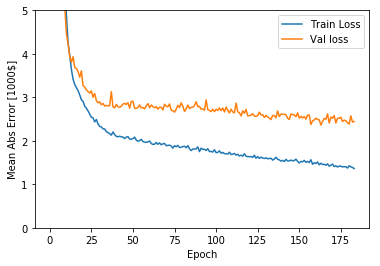

In [26]:
import matplotlib.pyplot as plt


def plot_history(history):
  plt.figure()
  plt.xlabel('Epoch')
  plt.ylabel('Mean Abs Error [1000$]')
  plt.plot(history.epoch, np.array(history.history['mean_absolute_error']),
           label='Train Loss')
  plt.plot(history.epoch, np.array(history.history['val_mean_absolute_error']),
           label = 'Val loss')
  plt.legend()#添加图示
  plt.ylim([0, 5])

plot_history(history)



....................................................................................................
....................................................................................

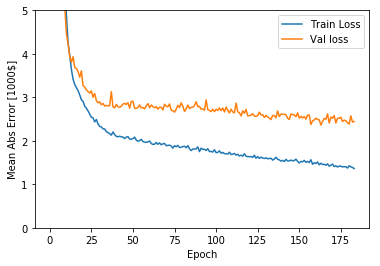

In [24]:
model = build_model()

# The patience parameter is the amount of epochs to check for improvement
early_stop = keras.callbacks.EarlyStopping(monitor='val_loss', patience=20)

history = model.fit(train_data, train_labels, epochs=EPOCHS,
                    validation_split=0.2, verbose=0,
                    callbacks=[early_stop, PrintDot()])

plot_history(history)


# predict

[ 8.212052  18.249071  20.748045  31.34729   24.256151  21.052282
 25.140352  21.442007  18.872713  22.106827  18.68804   15.57634
 15.242052  40.08531   19.08306   20.2017    25.03353   16.875557
 19.028837  25.705894  12.347131  13.20416   20.244389  16.348494
 19.053942  25.241129  27.461039  27.330832  10.552264  20.05088
 19.493687  14.018225  33.049057  24.134712  18.352566   7.715566
 16.375319  16.710003  18.322752  24.611687  29.096508  27.0165
 13.466301  40.94126   28.313452  24.970839  25.559391  16.86999
 22.112726  21.847216  33.76392   18.854364  10.748776  15.310465
 33.785652  27.273668  12.019896  46.363106  34.20247   23.151392
 24.65351   15.3435755 13.545584  18.842402  22.653227  19.939865
 13.597966  21.438944  12.353472   7.7252517 24.116264  28.720222
 26.416449  11.582678  23.542402  17.198301  19.434515  23.073843
 34.203117   9.905289  20.149977  35.241547  16.33327   13.283491
 16.537659  17.69895   19.776667  19.170527  20.630167  33.833733
 21.287054  18.

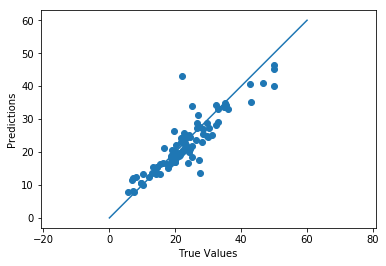

In [37]:
test_prediction = model.predict(test_data).flatten()
print(test_prediction)
plt.scatter(test_labels,test_prediction)
plt.xlabel('True Values')
plt.ylabel('Predictions')
print(plt.xlim())
plt.xlim(plt.xlim())
plt.ylim(plt.ylim())
plt.axis('equal')
_ = plt.plot([0,60],[0,60])


Text(0,0.5,'Count')

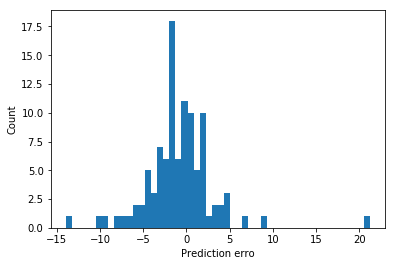

In [39]:
erro = test_prediction - test_labels
plt.hist(erro,bins = 50)
plt.xlabel('Prediction erro')
plt.ylabel('Count')